In [151]:
import glob
import pandas as pd
import tesserocr
from PIL import Image, ImageOps
from random import randint
from tqdm import tqdm


In [147]:
def grayscale(image):
    """Converts the image to grayscale."""
    return image.convert('L')


def threshold(image, threshold=127):
    """Applies a thresholding filter to the image."""
    return image.point(lambda x: 0 if x < threshold else 255)


def crop_image(image, crop_percentage_height=0.3, crop_percentage_width=0.1):
    width, height = image.size
    crop_height = int(height * crop_percentage_height)
    crop_width = int(width * crop_percentage_width)
    # Crop the image to the lower part
    return image.crop((crop_width, height - crop_height, width - crop_width, height))


def preprocess_image(image):
    image = crop_image(image)

    image = threshold(image, 225)

    image = grayscale(image)

    image = ImageOps.invert(image)

    return image



In [148]:
def detect_hebrew_subtitles(image, api):
    api.SetVariable("tessedit_char_whitelist", 'אבגדהוזחטיכלמנסעפצקרשתץףךןם !-?.0123456789"')
    api.SetImage(image)

    text = api.GetUTF8Text()

    return text.strip(), api.AllWordConfidences()

In [149]:
directory = 'D:\\memes\\'
files = glob.glob(directory + '**/*.jpg', recursive=True) + glob.glob(directory + '**/*.png', recursive=True) + glob.glob(directory + '**/*.jpeg', recursive=True)
api = tesserocr.PyTessBaseAPI(path=r".\tessdata-main", lang="heb", psm=tesserocr.PSM.SINGLE_BLOCK)

In [152]:
data = []

for f in tqdm(files[500:1000]):
    image = Image.open(f)
    image = preprocess_image(image)
    text, confidence = detect_hebrew_subtitles(image, api)
    d = f.replace('D:\\', '').replace('\\', '/')
    data.append({
        'image_url': d,
        'text': text,
        'confidence': confidence,
        'series': d.replace('memes/', '').split('/')
    })

100%|██████████| 500/500 [00:31<00:00, 15.79it/s]


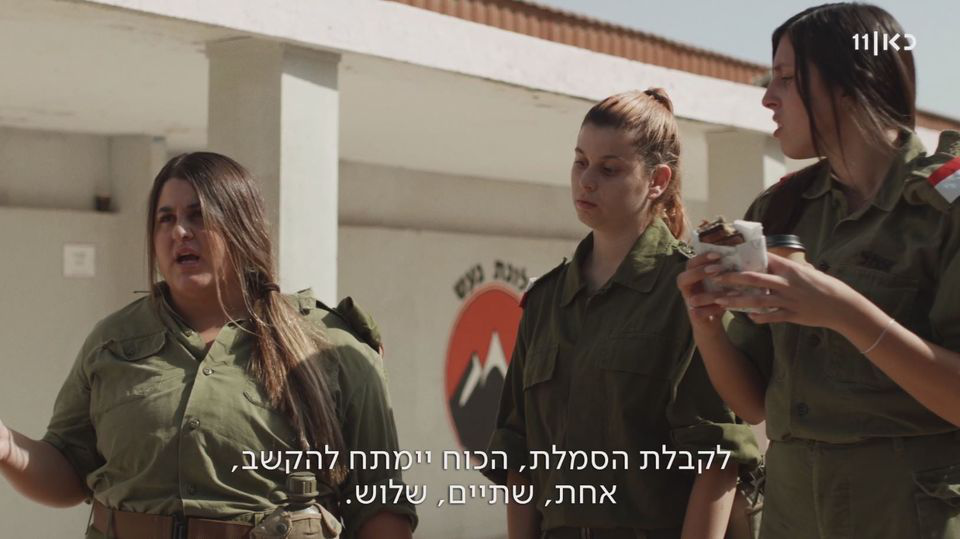

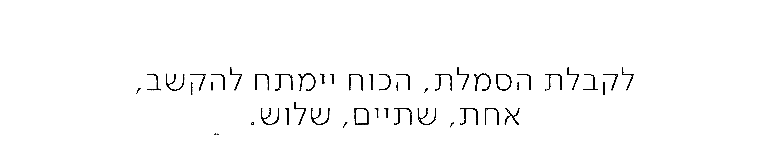

לקבלת הסמלת. הכוח וומתח להקשב
אחת. שתיים שלוש. -
[0, 85, 91, 0, 92, 0, 91, 0, 0]
  Word  Confidence Score
 לקבלת                 0
הסמלת.                85
  הכוח                91
 וומתח                 0
 להקשב                92
  אחת.                 0
 שתיים                91
 שלוש.                 0
     -                 0


In [156]:
def display_image_and_text(idx):
    image = Image.open('D:/'+data[idx]["image_url"])
    pro_image = preprocess_image(image)
    display(image, pro_image)

    print(data[idx]["text"])
    print(data[idx]["confidence"])
    print(pd.DataFrame({"Word": data[idx]['text'].split(), "Confidence Score": data[idx]["confidence"]}).to_string(index=False))

idx = randint(0, len(data))
display_image_and_text(idx)

In [74]:
data

[]

In [ ]:
df = pd.DataFrame(data)
df.to_json('memes.json', orient='records')